# CENTRAL LIMIT THEOREM


Uno dei teoremi fondamentali dela statistica  e della probabilità è il teorema del limite centrale e afferma che:
siano $X_j$ una serie di v.c i.i.d la somma di queste variabili $$S_n = \sum_{j=1}^{n} X_j$$ converge in DISTRIBUZIONE a  $ N(n\mu,\sigma^2) $ normalizzandola ottieniamo la normale standard . $$\frac{S_n-n\mu}{\sqrt{\sigma^2}}\xrightarrow{d}N(0,1)$$

Da questo segue naturalemte che la media campionaria $ \overline{X} \sim N(\mu,\frac{\sigma^2}{\sqrt(n)}) $ il che standardizzando otteniamo $ N(0, 1) $

La distribuzione normale emerge naturalmente come risultato del processo di convoluzione di molte variabili casuali indipendenti. Anche se le distribuzioni originali non sono normali, la somma delle variabili tende verso una distribuzione normale per il principio del Teorema del Limite Centrale. Ecco perché:

La convoluzione di distribuzioni ripetute tende a "smussare" la distribuzione risultante, eliminando eventuali picchi o irregolarità nelle distribuzioni originali.
Le probabilità più alte, che si trovano tipicamente attorno alla media delle variabili casuali, si combinano e si sommano tra loro. Questo porta a un accumulo di probabilità attorno alla media, formando un "picco" centrale.
Allo stesso tempo, le probabilità delle code, che sono più basse, si ridistribuiscono gradualmente, creando le code della distribuzione normale. Il risultato è la caratteristica forma a campana, con la maggior parte delle probabilità concentrate attorno alla media e le code che si estendono simmetricamente.
Se le variabili casuali non sono identicamente distribuite, ma non differiscono troppo tra loro in termini di media e varianza, la somma delle convoluzioni delle loro distribuzioni tende ancora a formare una distribuzione a campana, anche se potrebbe richiedere un numero maggiore di variabili per raggiungere una distribuzione simile alla normale.

L'idea di base è che la somma di variabili casuali tende a "livellare" le differenze tra le singole distribuzioni, perché le componenti estreme di ciascuna distribuzione tendono a cancellarsi a vicenda, mentre le componenti centrali, vicine alla media, si sommano e creano un picco attorno alla media totale. Questo è il motivo per cui la somma di variabili casuali non identicamente distribuite può comunque convergere verso una normale.
Esiste un teorema che generalizza il Teorema del Limite Centrale (TLC) per variabili casuali non identicamente distribuite ma indipendenti, ed è conosciuto come il Teorema del Limite Centrale di Lindeberg-Feller.

## verifica della bontà delle approssimazioni
verificheremo la bontà di approssimazione della media campionaria per varie distribuzioni, tale approssimazione è diffusamente usata per intervalli di confidenza e statistiche test approssimate


In [3]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


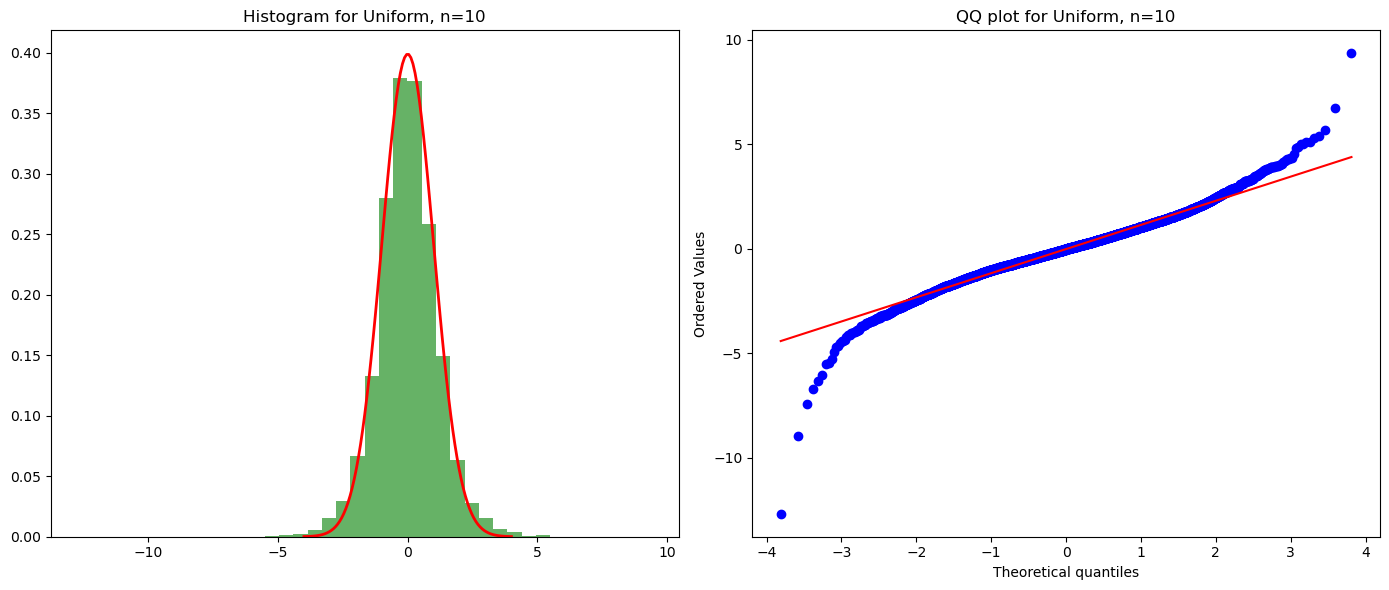

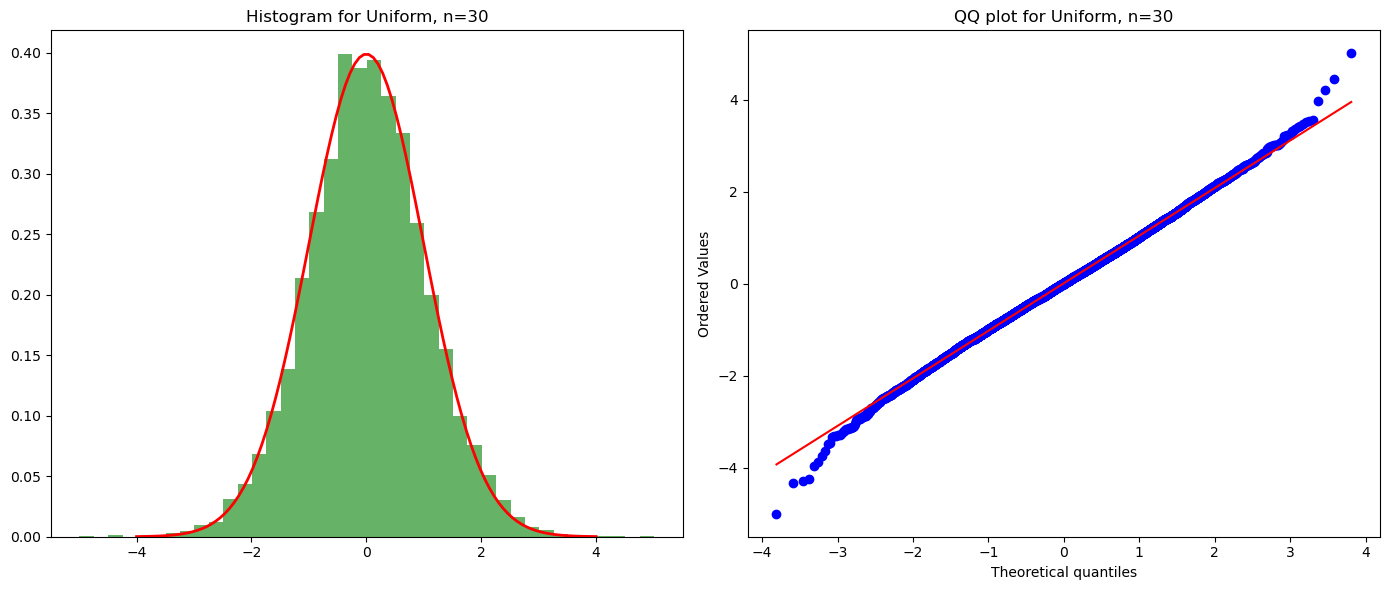

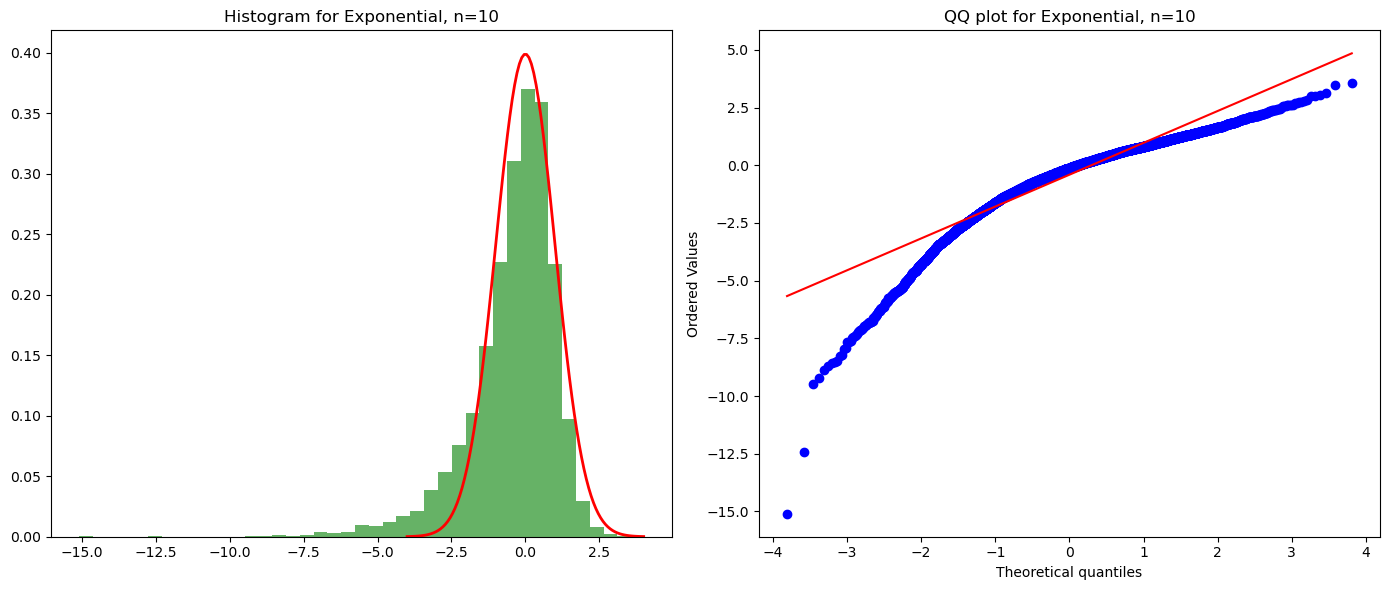

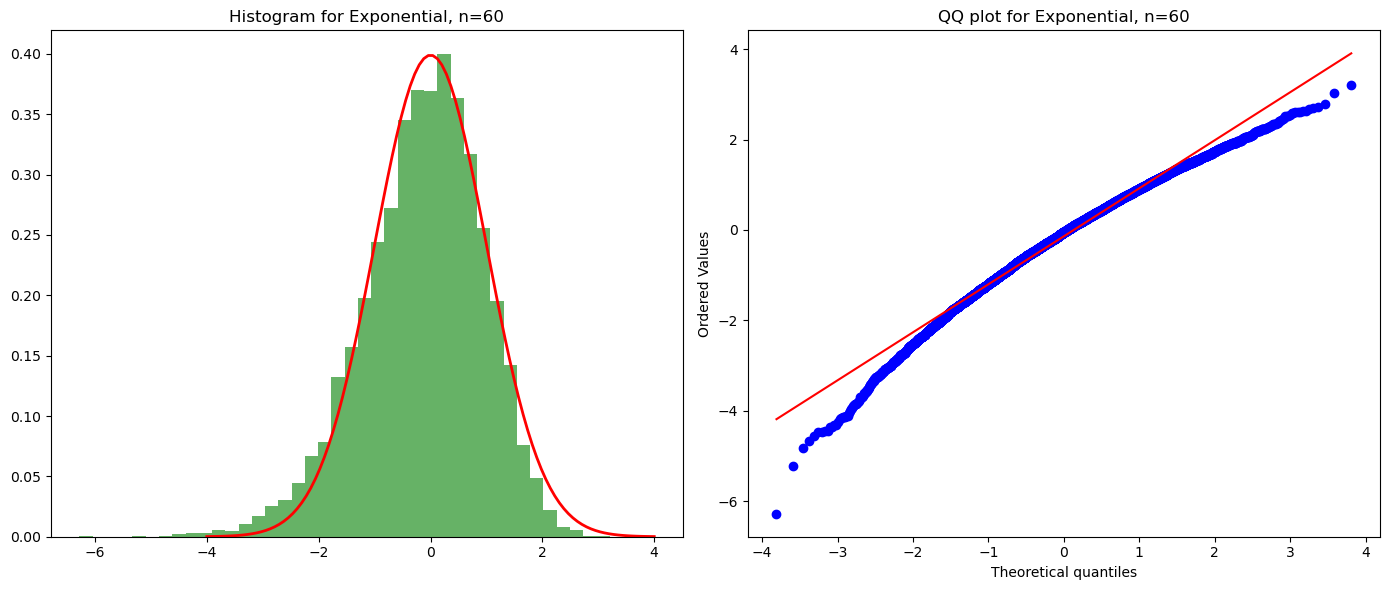

In [5]:
def gent(n, rf, mu, B = 10000):
    #sample generation
    y = np.array([rf(n) for _ in range(B)]).T
    ybar = np.mean(y, axis= 0)
    s = np.std(y, axis = 0, ddof=1)
    t_stat = np.sqrt(n)*(ybar-mu)/s
    return t_stat

def plot_results(n, rf, mu, dist_name=""):
    # Calcolo delle statistiche del test
    valori = gent(n, rf, mu)

    # Creazione del grafico
    plt.figure(figsize=(14, 6))
    
    # Istogramma e curva della distribuzione normale
    plt.subplot(1, 2, 1)
    plt.hist(valori, bins=40, density=True, alpha=0.6, color='g')
    x = np.linspace(-4, 4, 100)
    plt.plot(x, stats.norm.pdf(x), 'r-', lw=2)
    plt.title(f"Histogram for {dist_name}, n={n}")
    
    # Grafico QQ
    plt.subplot(1, 2, 2)
    stats.probplot(valori, dist="norm", plot=plt)
    plt.title(f"QQ plot for {dist_name}, n={n}")
    
    plt.tight_layout()
    plt.show()
    
# Verifica con campioni uniformi
plot_results(10, lambda size: np.random.uniform(0, 1, size=size), 0.5, dist_name="Uniform")
plot_results(30, lambda size: np.random.uniform(0, 1, size=size), 0.5, dist_name="Uniform")

# Verifica con campioni esponenziali
plot_results(10, lambda size: np.random.exponential(1, size=size), 1, dist_name="Exponential")
plot_results(60, lambda size: np.random.exponential(1, size=size), 1, dist_name="Exponential")